# Question2: Develop a logistic regression model that can be used by ScaleneWorks for predicting candidates who are unlikely to join after accepting the offer. Which are the variables having statistical significance on renege? 

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/Amrita/OneDrive/Desktop/renege.csv")
df.head()

,Status,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age
0,Joined,2110407,Yes,14.0,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34
1,Joined,2112635,No,18.0,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34
2,Joined,2112838,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27
3,Joined,2115021,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34
4,Joined,2115125,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34


In [3]:
df.shape

(12333, 17)

In [4]:
df.dtypes

Status                          object
Candidate Ref                    int64
DOJ Extended                    object
Duration to accept offer       float64
Notice period                    int64
Offered band                    object
Pecent hike expected in CTC    float64
Percent hike offered in CTC    float64
Percent difference CTC         float64
Joining Bonus                   object
Candidate relocate actual       object
Gender                          object
Candidate Source                object
Rex in Yrs                       int64
LOB                             object
Location                        object
Age                              int64
dtype: object

In [5]:
df.isna().sum()

Status                            0
Candidate Ref                     0
DOJ Extended                      0
Duration to accept offer       2719
Notice period                     0
Offered band                      0
Pecent hike expected in CTC     747
Percent hike offered in CTC     596
Percent difference CTC          851
Joining Bonus                     0
Candidate relocate actual         0
Gender                            0
Candidate Source                  0
Rex in Yrs                        0
LOB                               0
Location                          0
Age                               0
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.isna().sum()

Status                         0
Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
LOB                            0
Location                       0
Age                            0
dtype: int64

In [8]:
df.shape

(9011, 17)

In [9]:
df.describe()

,Candidate Ref,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age
count,9.011000e+03,9011.000000,9011.000000,9011.000000,9011.000000,9011.000000,9011.000000,9011.000000
mean,2.843302e+06,21.369437,39.278659,43.861520,40.656652,-1.569059,4.239929,29.916879
std,4.864133e+05,25.938301,22.230658,29.860747,36.084426,19.608174,2.552387,4.116165
min,2.109586e+06,-228.000000,0.000000,-68.830000,-60.530000,-67.270000,0.000000,20.000000
25%,2.383377e+06,3.000000,30.000000,27.270000,22.080000,-8.330000,3.000000,27.000000
50%,2.807385e+06,10.000000,30.000000,40.000000,36.000000,0.000000,4.000000,29.000000
75%,3.300058e+06,33.000000,60.000000,53.850000,50.000000,0.000000,6.000000,34.000000
max,3.836076e+06,224.000000,120.000000,359.770000,471.430000,300.000000,24.000000,62.000000


In [10]:
df['Status'].value_counts()

Joined        7326
Not Joined    1685
Name: Status, dtype: int64

C:\Users\Amrita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

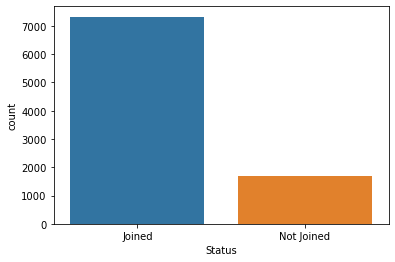

In [11]:
#Visualize this count 
sns.countplot(df['Status'])

In [12]:
#Print all of the object data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")

Status : ['Joined' 'Not Joined']
Joined        7326
Not Joined    1685
Name: Status, dtype: int64
_________________________________________________________________
DOJ Extended : ['Yes' 'No']
No     4802
Yes    4209
Name: DOJ Extended, dtype: int64
_________________________________________________________________
Offered band : ['E2' 'E1' 'E3' 'E0']
E1    5578
E2    2717
E3     505
E0     211
Name: Offered band, dtype: int64
_________________________________________________________________
Joining Bonus : ['No' 'Yes']
No     8593
Yes     418
Name: Joining Bonus, dtype: int64
_________________________________________________________________
Candidate relocate actual : ['No' 'Yes']
No     7717
Yes    1294
Name: Candidate relocate actual, dtype: int64
_________________________________________________________________
Gender : ['Female' 'Male']
Male      7457
Female    1554
Name: Gender, dtype: int64
_________________________________________________________________
Candidate Source : ['Agen

In [13]:
#Remove unneeded columns

#df = df.drop('Candidate Ref', axis = 1) #Candidate Ref


In [14]:
df.isna().sum()

Status                         0
Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
LOB                            0
Location                       0
Age                            0
dtype: int64

In [15]:
#Get the correlation of the columns
df.corr()

,Candidate Ref,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age
Candidate Ref,1.000000,-0.028813,-0.120604,0.077806,0.045478,-0.016484,-0.046759,0.305865
Duration to accept offer,-0.028813,1.000000,0.363399,0.019011,0.008789,-0.007743,0.113525,0.020527
Notice period,-0.120604,0.363399,1.000000,-0.005878,-0.013772,-0.014865,0.180287,-0.006089
Pecent hike expected in CTC,0.077806,0.019011,-0.005878,1.000000,0.669025,-0.161867,-0.211002,-0.129688
Percent hike offered in CTC,0.045478,0.008789,-0.013772,0.669025,1.000000,0.597971,-0.107519,-0.075892
Percent difference CTC,-0.016484,-0.007743,-0.014865,-0.161867,0.597971,1.000000,0.080041,0.036725
Rex in Yrs,-0.046759,0.113525,0.180287,-0.211002,-0.107519,0.080041,1.000000,0.570410
Age,0.305865,0.020527,-0.006089,-0.129688,-0.075892,0.036725,0.570410,1.000000


<AxesSubplot:>

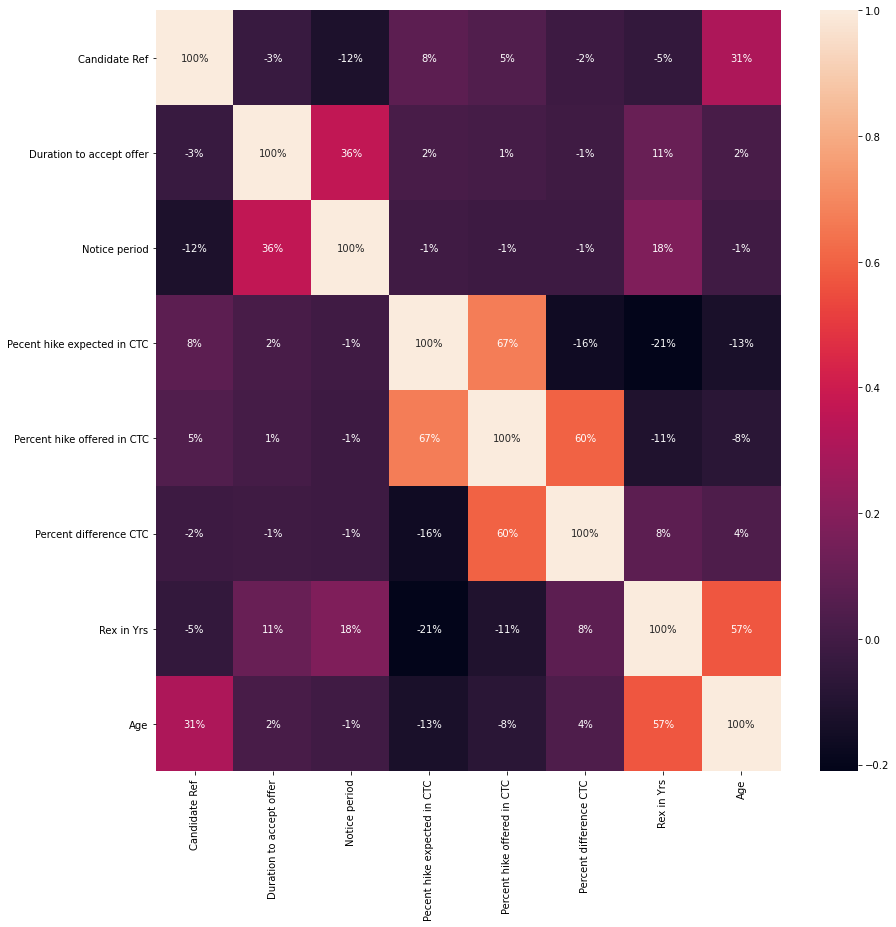

In [16]:
#Visualize the correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [17]:
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

<ipython-input-17-65d4579fc77b>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [18]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.loc[:,"DOJ Extended":"Age"].values
Y = df.loc[:, "Status"].values

In [19]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [20]:
Y_train

array([0, 0, 0, ..., 1, 0, 0])

In [21]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  

In [22]:
##Use Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [23]:
model.fit(X_train, Y_train)

LogisticRegression()

In [24]:
model.coef_

array([[-5.05277095e-02, -9.83721762e-04,  4.13215201e-01,
        -6.35535985e-02,  1.11887460e-01, -1.25115271e-01,
         3.39292855e-02,  6.70941522e-02, -2.07649564e+00,
         4.76324483e-02, -2.54148514e-01,  1.87328475e-01,
        -1.41897325e-01, -1.57470749e-01, -2.09895776e-01]])

In [25]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X_train)
mod = sm.OLS(Y_train,X2)
fii = mod.fit()
print(fii.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.094    
Dependent Variable: y                AIC:                5868.3113
Date:               2022-05-29 09:01 BIC:                5977.4070
No. Observations:   6758             Log-Likelihood:     -2918.2  
Df Model:           15               F-statistic:        47.47    
Df Residuals:       6742             Prob (F-statistic): 1.10e-134
R-squared:          0.096            Scale:              0.13919  
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const      0.1894     0.0045    41.7342   0.0000    0.1805    0.1983
x1        -0.0092     0.0048    -1.8987   0.0576   -0.0187    0.0003
x2        -0.0021     0.0052    -0.4003   0.6889   -0.0123    0.0081
x3         0.0648     0.0050    12.9252   0.0000    0.0549    0.0746

# Question3: Devise a predictive algorithm to calculate the probability of acceptance of an offer and finally joining the company after offer acceptance.

In [26]:
y_pred_prob = model.predict_proba(X_test)

In [27]:
y_pred_prob

array([[8.19438622e-01, 1.80561378e-01],
       [9.99076133e-01, 9.23866501e-04],
       [7.90353023e-01, 2.09646977e-01],
       ...,
       [9.45051501e-01, 5.49484993e-02],
       [8.04891946e-01, 1.95108054e-01],
       [7.92191049e-01, 2.07808951e-01]])

In [28]:
model.score(X_test,Y_test) #to get accuracy

0.821127385707945

In [29]:
from sklearn.metrics import confusion_matrix

In [32]:
y_pred = model.predict(X_test)
cf_matrix = confusion_matrix(Y_test, y_pred)
print(cf_matrix)

[[1823   25]
 [ 378   27]]


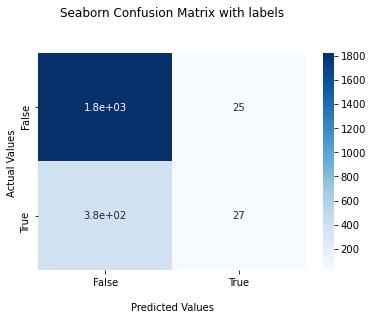

In [36]:
#Visualize the confusion matrix
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot= True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [34]:
from sklearn.metrics import roc_auc_score,accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print("f1_score = ",f1_score(Y_test,y_pred, average="macro"))
print("accuracy_score = ",accuracy_score(Y_test,y_pred))
print("precision_score = ",precision_score(Y_test,y_pred, average="macro"))
print("sensitivity = ",recall_score(Y_test,y_pred, average="macro")) #sensitivity
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print("specificity = ",specificity)

f1_score =  0.5093155886344145
accuracy_score =  0.821127385707945
precision_score =  0.6737453255513228
sensitivity =  0.5265692640692641
specificity =  0.9864718614718615


# Question5: What cut-off probability should Scalene Works use to classify joining and not joining the firm after accepting the offer?

In [39]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = metrics.roc_curve(Y_test,y_pred_prob[:, -1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.724228


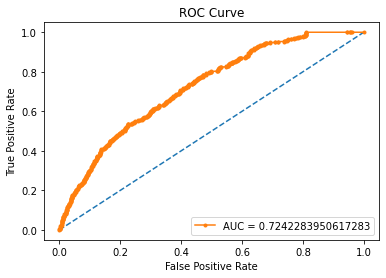

In [40]:
false_pos_rate, true_pos_rate, proba = roc_curve(Y_test,y_pred_prob[:, -1])
plt.figure()
plt.plot([0,1], [0,1], linestyle="--") # plot random curve
plt.plot(false_pos_rate, true_pos_rate, marker=".", label=f"AUC = {roc_auc_score(Y_test,y_pred_prob[:, -1])}")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")

In [41]:
optimal_proba_cutoff = sorted(list(zip(np.abs(true_pos_rate - false_pos_rate), proba)), key=lambda i: i[0], reverse=True)[0][1]
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in y_pred_prob[:, -1]]

In [42]:
print(optimal_proba_cutoff)

0.17326073167373335


In [43]:
#Cooks distance
import numpy as np
np.set_printoptions(suppress=True)

#create instance of influence
influence = fii.get_influence()

#obtain Cook's distance for each observation
cooks = influence.cooks_distance

#display Cook's distances
print(cooks)

(array([0.00002304, 0.00002404, 0.00001526, ..., 0.00056989, 0.00001784,
       0.000042  ]), array([1., 1., 1., ..., 1., 1., 1.]))


In [44]:
#Visualizing Cooks Distance
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
train_df = pd.DataFrame(X_train)
train_df.index
#X_train.index

RangeIndex(start=0, stop=6758, step=1)

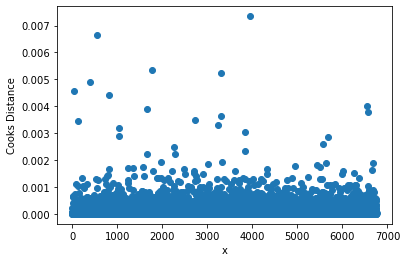

In [45]:
import matplotlib.pyplot as plt

plt.scatter(train_df.index, cooks[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()


# Using Random Forest Algorithm #

In [47]:
#Use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [48]:
#Get the accuracy on the testing data
forest.score(X_test, Y_test)

0.8131380381713271

In [49]:
#F1 Score
#F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. 
#If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.
# Import f1_score
from sklearn.metrics import f1_score
# Predict the labels of the test set
y_pred2 = forest.predict(X_test)

# Print the F1 score
print(f1_score(Y_test, y_pred2))

0.25486725663716814


In [50]:
#Show the confusion matrix and accuracy for  the model on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Precision = "{}!"'.format(  TP  / (TP + FP )))
print('Model Testing Recall = "{}!"'.format(  TP  / (TP + FN )))
print(f1_score(Y_test, y_pred2))
print()# Print a new line

[[1760   88]
 [ 333   72]]
Model Testing Precision = "0.45!"
Model Testing Recall = "0.17777777777777778!"
0.25486725663716814



In [59]:
df.iloc[:, 2:df.shape[1]].columns

Index(['DOJ Extended', 'Duration to accept offer', 'Notice period',
       'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age'],
      dtype='object')

In [56]:
np.round(forest.feature_importances_,3)

array([0.021, 0.154, 0.056, 0.021, 0.12 , 0.14 , 0.107, 0.009, 0.059,
       0.019, 0.032, 0.073, 0.057, 0.045, 0.087])

In [58]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':df.iloc[:, 2:df.shape[1]].columns,'importance':np.round(forest.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Duration to accept offer,0.154
Percent hike offered in CTC,0.140
Pecent hike expected in CTC,0.120
Percent difference CTC,0.107
Age,0.087
Rex in Yrs,0.073
Candidate relocate actual,0.059
LOB,0.057
Notice period,0.056


<AxesSubplot:xlabel='feature'>

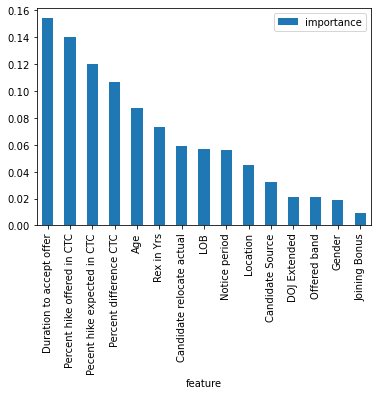

In [60]:
importances.reset_index(inplace = True)
#Visualize the importance
importances.plot.bar(x="feature",y="importance")